## Data

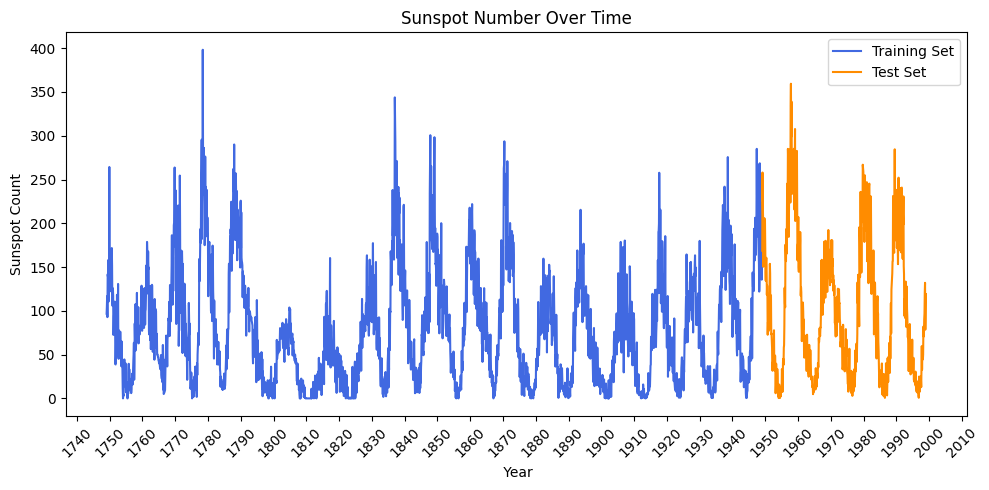

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load data
df = pd.read_csv('data/Sunspots_clean_3k.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Split into training and test sets
train_set = df[:2400]
test_set = df[2400:3000]

# Plot
plt.figure(figsize=(10, 5))

# Plot training set
plt.plot(train_set['Date'], train_set['Sunspots'], color='royalblue', label='Training Set')

# Plot test set
plt.plot(test_set['Date'], test_set['Sunspots'], color='darkorange', label='Test Set')

# Set x-axis ticks every 10 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve appearance
plt.xticks(rotation=45)
plt.xlabel(' Year')
plt.ylabel('Sunspot Count')
plt.title('Sunspot Number Over Time')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('data/Sunspots_clean_3k.csv')
df['Date'] = pd.to_datetime(df['Date'])

values = df['Sunspots'].values

# Normalize data to [0, 1]
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(values.reshape(-1, 1)).flatten()

# Split into training and test sets
n = len(scaled_series) * 0.8
train_set = scaled_series[:int(n)] # 80% for training
test_set = scaled_series[int(n):]

print(f"Train set: {len(train_set)}, Test set: {len(test_set)}")

Train set: 2400, Test set: 600


<Figure size 1000x500 with 0 Axes>

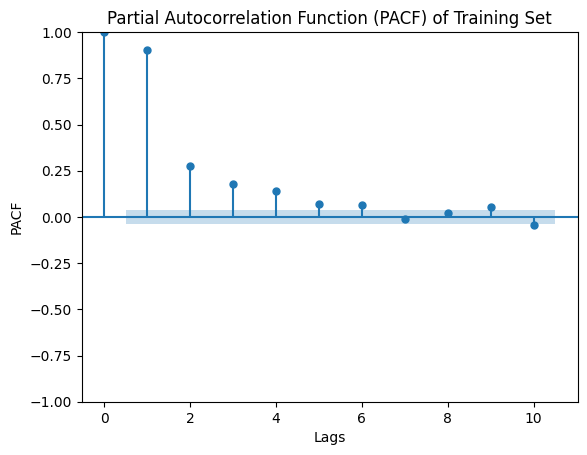

In [4]:
# Plot PACF for train_set
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10, 5))
plot_pacf(train_set, lags=10, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Training Set')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

<Figure size 1000x500 with 0 Axes>

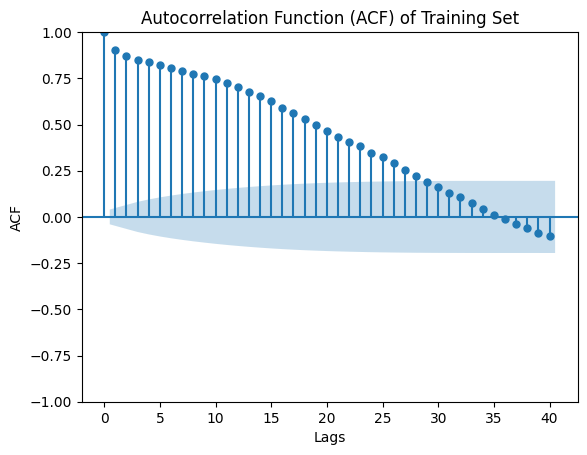

In [5]:
# Plot ACF for train_set
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 5))
plot_acf(train_set, lags=40)
plt.title('Autocorrelation Function (ACF) of Training Set')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

## Modeling

### IProjLSTM Stochastic

In [ ]:
# import torch
# import torch.nn as nn

# # IProjLSTMCell helper networks 
# class RefNetwork(nn.Module):
#     def __init__(self, input_dim, hidden_dim):
#         super(RefNetwork, self).__init__()
#         self.W_mu = nn.Linear(input_dim, hidden_dim, bias=False)
#         self.U_mu = nn.Linear(hidden_dim, hidden_dim)
#         self.W_sigma = nn.Linear(input_dim, hidden_dim, bias=False)
#         self.U_sigma = nn.Linear(hidden_dim, hidden_dim)

#     def forward(self, x_t, h_prev):
#         mu_t = self.W_mu(x_t) + self.U_mu(h_prev) 
#         log_sigma2_t = self.W_sigma(x_t) + self.U_sigma(h_prev) 
#         sigma2_t = torch.exp(log_sigma2_t) 
#         return mu_t, sigma2_t

# # Constraint for I-projection
# class TargetConstraintNetwork(nn.Module):
#     def __init__(self, input_dim, hidden_dim, learn_sigma=True):
#         super(TargetConstraintNetwork, self).__init__()
#         self.W_target = nn.Linear(input_dim, hidden_dim, bias=False)
#         self.U_target = nn.Linear(hidden_dim, hidden_dim)
#         self.learn_sigma = learn_sigma
#         if learn_sigma: # Learn variance
#             self.W_sigma_target = nn.Linear(input_dim, hidden_dim, bias=False)
#             self.U_sigma_target = nn.Linear(hidden_dim, hidden_dim)
#         else:
#             self.register_buffer('fixed_sigma2', torch.ones(hidden_dim)) 

#     def forward(self, x_t, h_prev):
#         mu_t_prime = self.W_target(x_t) + self.U_target(h_prev)
#         if self.learn_sigma:
#             log_sigma2_prime = self.W_sigma_target(x_t) + self.U_sigma_target(h_prev)
#             sigma2_t_prime = torch.exp(log_sigma2_prime)
#         else:
#             sigma2_t_prime = self.fixed_sigma2
#         return mu_t_prime, sigma2_t_prime

# # Main IProjLSTM Cell 
# class IProjLSTMCell(nn.Module):
#     def __init__(self, input_dim, hidden_dim):
#         super().__init__()
#         self.hidden_dim = hidden_dim
#         self.ref_net = RefNetwork(input_dim, hidden_dim)
#         self.target_net = TargetConstraintNetwork(input_dim, hidden_dim)
#         self.W_o = nn.Linear(input_dim, hidden_dim)
#         self.U_o = nn.Linear(hidden_dim, hidden_dim)

#     def forward(self, x_t, h_prev):
#         mu_ref, sigma2_ref = self.ref_net(x_t, h_prev) 
#         mu_target, sigma2_target = self.target_net(x_t, h_prev)
#         mu_proj, sigma2_proj = mu_target, sigma2_ref  # I-projection

#         # Stochastic cell state sampling
#         epsilon = torch.randn_like(mu_proj)
#         C_t = mu_proj + torch.sqrt(sigma2_proj + 1e-8) * epsilon
#         o_t = torch.sigmoid(self.W_o(x_t) + self.U_o(h_prev))
#         h_t = o_t * torch.tanh(C_t)
#         return h_t, C_t

# # Full model using the custom cell
# class IProjLSTMModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, seq_len):
#         super().__init__()
#         self.seq_len = seq_len
#         self.hidden_dim = hidden_dim
#         self.cell = IProjLSTMCell(input_dim, hidden_dim)
#         self.output_layer = nn.Linear(hidden_dim, 1)

#     def forward(self, x_seq):
#         batch_size = x_seq.size(0)
#         h_t = torch.zeros(batch_size, self.hidden_dim, device=x_seq.device)
#         for t in range(self.seq_len):
#             x_t = x_seq[:, t, :]
#             h_t, C_t = self.cell(x_t, h_t)[:2]
#         y_pred = self.output_layer(h_t)
#         return y_pred

In [ ]:
# from torch.utils.data import Dataset, DataLoader

# # Dataset class
# class TimeSeriesDataset(Dataset):
#     def __init__(self, series, seq_len=20):
#         self.series = torch.tensor(series, dtype=torch.float32)
#         self.seq_len = seq_len

#     def __len__(self):
#         return len(self.series) - self.seq_len

#     def __getitem__(self, idx):
#         x = self.series[idx:idx+self.seq_len]
#         y = self.series[idx+self.seq_len]
#         return x.unsqueeze(-1), y.unsqueeze(-1)

# # Parameters
# seq_len = 16
# batch_size = 32

# # DataLoaders
# train_dataset = TimeSeriesDataset(train_set, seq_len)
# test_dataset = TimeSeriesDataset(test_set, seq_len)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Model setup
# model = IProjLSTMModel(input_dim=1, hidden_dim=32, seq_len=seq_len)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = torch.nn.MSELoss()

# # Training loop
# num_epochs = 100
# train_losses = []
# for epoch in range(num_epochs):
#     model.train()
#     epoch_loss = 0.0
#     for x_batch, y_batch in train_loader:
#         x_batch, y_batch = x_batch.to(device), y_batch.to(device)
#         optimizer.zero_grad()
#         y_pred = model(x_batch)
#         loss = criterion(y_pred, y_batch)
#         loss.backward()
#         optimizer.step()
#         epoch_loss += loss.item()
#     avg_loss = epoch_loss / len(train_loader)
#     train_losses.append(avg_loss)
#     if (epoch+1) % 10 == 0 or epoch == 0:
#         print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}")


Epoch 1/100, Train Loss: 0.0462
Epoch 10/100, Train Loss: 0.0070
Epoch 20/100, Train Loss: 0.0043
Epoch 30/100, Train Loss: 0.0042
Epoch 40/100, Train Loss: 0.0042
Epoch 50/100, Train Loss: 0.0042
Epoch 60/100, Train Loss: 0.0042
Epoch 70/100, Train Loss: 0.0042
Epoch 80/100, Train Loss: 0.0042
Epoch 90/100, Train Loss: 0.0042
Epoch 100/100, Train Loss: 0.0041


In [ ]:
# # Evaluation
# model.eval()
# preds = []
# targets = []

# with torch.no_grad():
#     for x_batch, y_batch in test_loader:
#         x_batch = x_batch.to(device)
#         y_pred = model(x_batch)
#         preds.append(y_pred.cpu())
#         targets.append(y_batch.cpu())

# # Concatenate all batches
# preds = torch.cat(preds).squeeze().numpy()
# targets = torch.cat(targets).squeeze().numpy()

# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mae = mean_absolute_error(targets, preds)
# rmse = np.sqrt(mean_squared_error(targets, preds))

# print(f"Test MAE  : {mae:.4f}")
# print(f"Test RMSE : {rmse:.4f}")

Test MAE  : 0.0487
Test RMSE : 0.0668


### IProjLSTM Deterministic

In [6]:
import torch
import torch.nn as nn

# IProjLSTMCell helper networks 
class RefNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(RefNetwork, self).__init__()
        self.W_mu = nn.Linear(input_dim, hidden_dim, bias=False)
        self.U_mu = nn.Linear(hidden_dim, hidden_dim)
        self.W_sigma = nn.Linear(input_dim, hidden_dim, bias=False)
        self.U_sigma = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x_t, h_prev):
        mu_t = self.W_mu(x_t) + self.U_mu(h_prev) 
        log_sigma2_t = self.W_sigma(x_t) + self.U_sigma(h_prev) 
        sigma2_t = torch.exp(log_sigma2_t) 
        return mu_t, sigma2_t

# Constraint for I-projection
class TargetConstraintNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, learn_sigma=True):
        super(TargetConstraintNetwork, self).__init__()
        self.W_target = nn.Linear(input_dim, hidden_dim, bias=False)
        self.U_target = nn.Linear(hidden_dim, hidden_dim)
        self.learn_sigma = learn_sigma
        if learn_sigma: 
            self.W_sigma_target = nn.Linear(input_dim, hidden_dim, bias=False)
            self.U_sigma_target = nn.Linear(hidden_dim, hidden_dim)
        else:
            self.register_buffer('fixed_sigma2', torch.ones(hidden_dim)) 

    def forward(self, x_t, h_prev):
        mu_t_prime = self.W_target(x_t) + self.U_target(h_prev)
        if self.learn_sigma: 
            log_sigma2_prime = self.W_sigma_target(x_t) + self.U_sigma_target(h_prev)
            sigma2_t_prime = torch.exp(log_sigma2_prime)
        else:
            sigma2_t_prime = self.fixed_sigma2
        return mu_t_prime, sigma2_t_prime

# Main IProjLSTM Cell 
class IProjLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.ref_net = RefNetwork(input_dim, hidden_dim)
        self.target_net = TargetConstraintNetwork(input_dim, hidden_dim)
        self.W_o = nn.Linear(input_dim, hidden_dim)
        self.U_o = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x_t, h_prev):
        mu_ref, sigma2_ref = self.ref_net(x_t, h_prev) 
        mu_target, sigma2_target = self.target_net(x_t, h_prev)
        mu_proj, sigma2_proj = mu_target, sigma2_ref  # I-projection

        # Deterministic cell state
        C_t = mu_proj
        o_t = torch.sigmoid(self.W_o(x_t) + self.U_o(h_prev))
        h_t = o_t * torch.tanh(C_t)
        return h_t, C_t

# Full model using the custom cell 
class IProjLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, seq_len):
        super().__init__()
        self.seq_len = seq_len
        self.hidden_dim = hidden_dim
        self.cell = IProjLSTMCell(input_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, x_seq):
        batch_size = x_seq.size(0)
        h_t = torch.zeros(batch_size, self.hidden_dim, device=x_seq.device)
        for t in range(self.seq_len):
            x_t = x_seq[:, t, :]
            h_t, C_t = self.cell(x_t, h_t)[:2]
        y_pred = self.output_layer(h_t)
        return y_pred

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Dataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_len=20): 
        self.series = torch.tensor(series, dtype=torch.float32)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.series) - self.seq_len

    def __getitem__(self, idx):
        x = self.series[idx:idx+self.seq_len]
        y = self.series[idx+self.seq_len]
        return x.unsqueeze(-1), y.unsqueeze(-1)

# Parameters
seq_len = 16
batch_size = 32

# DataLoaders
train_dataset = TimeSeriesDataset(train_set, seq_len)
test_dataset = TimeSeriesDataset(test_set, seq_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model setup
model = IProjLSTMModel(input_dim=1, hidden_dim=32, seq_len=seq_len)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

# Training loop
num_epochs = 100
train_losses = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}")

Epoch 1/100, Train Loss: 0.0285


In [19]:
# Evaluation 
model.eval()
preds = []
targets = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        y_pred = model(x_batch)
        preds.append(y_pred.cpu())
        targets.append(y_batch.cpu())

# Concatenate all batches
preds = torch.cat(preds).squeeze().numpy()
targets = torch.cat(targets).squeeze().numpy()

from sklearn.metrics import mean_absolute_error, mean_squared_error

iproj_mae = mean_absolute_error(targets, preds)
iproj_rmse = np.sqrt(mean_squared_error(targets, preds))

print(f"Test MAE  : {iproj_mae:.4f}")
print(f"Test RMSE : {iproj_rmse:.4f}")

Test MAE  : 0.0476
Test RMSE : 0.0626


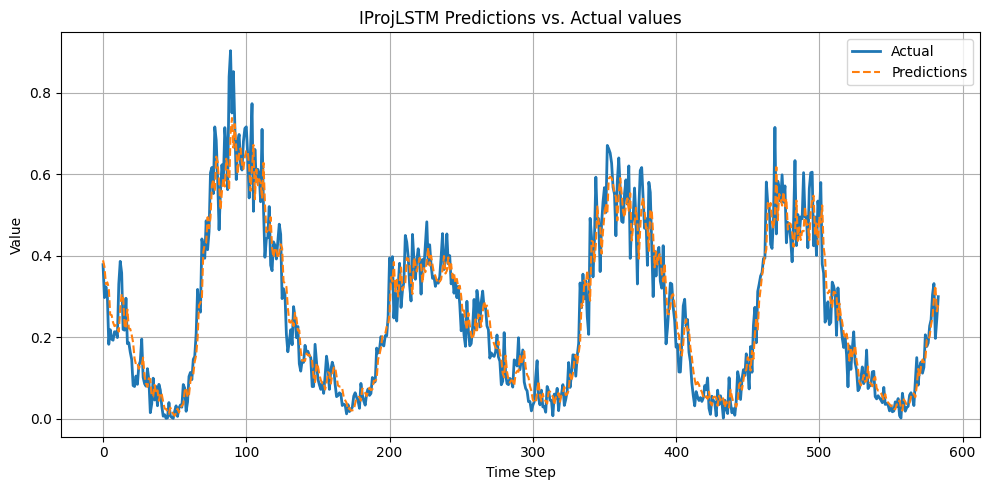

In [10]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(targets, label='Actual', linewidth=2)
plt.plot(preds, label='Predictions', linestyle='--')
plt.title("IProjLSTM Predictions vs. Actual values")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM

In [20]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1, seq_len=20):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.output_layer = nn.Linear(hidden_dim, 1)
        self.seq_len = seq_len
        self.hidden_dim = hidden_dim
        
    def forward(self, x_seq):
        out, _ = self.lstm(x_seq)
        last_hidden = out[:, -1, :]  # take output at final timestep
        y_pred = self.output_layer(last_hidden)
        return y_pred

# Initialize model
lstm_model = LSTMModel(input_dim=1, hidden_dim=32, seq_len=seq_len)
lstm_model = lstm_model.to(device)

optimizer_lstm = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

num_epochs = 100
# Training loop
lstm_losses = []
for epoch in range(num_epochs):
    lstm_model.train()
    epoch_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer_lstm.zero_grad()
        y_pred = lstm_model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer_lstm.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    lstm_losses.append(avg_loss)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"[LSTM] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}")

[LSTM] Epoch 1/100, Train Loss: 0.0330
[LSTM] Epoch 10/100, Train Loss: 0.0046
[LSTM] Epoch 20/100, Train Loss: 0.0042
[LSTM] Epoch 30/100, Train Loss: 0.0040
[LSTM] Epoch 40/100, Train Loss: 0.0040
[LSTM] Epoch 50/100, Train Loss: 0.0041
[LSTM] Epoch 60/100, Train Loss: 0.0040
[LSTM] Epoch 70/100, Train Loss: 0.0040
[LSTM] Epoch 80/100, Train Loss: 0.0039
[LSTM] Epoch 90/100, Train Loss: 0.0040
[LSTM] Epoch 100/100, Train Loss: 0.0039


In [21]:
lstm_model.eval()
lstm_preds = []
lstm_targets = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        y_pred = lstm_model(x_batch)
        lstm_preds.append(y_pred.cpu())
        lstm_targets.append(y_batch.cpu())

lstm_preds = torch.cat(lstm_preds).squeeze().numpy()
lstm_targets = torch.cat(lstm_targets).squeeze().numpy()

from sklearn.metrics import mean_absolute_error, mean_squared_error
lstm_mae = mean_absolute_error(lstm_targets, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(lstm_targets, lstm_preds))

print(f"[LSTM] Test MAE  : {lstm_mae:.4f}")
print(f"[LSTM] Test RMSE : {lstm_rmse:.4f}")

[LSTM] Test MAE  : 0.0470
[LSTM] Test RMSE : 0.0627


### AR(1)

In [14]:
## AR(1) OLS
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf

# Prepare AR(1) design matrix for training
p = 1  # AR order
T_train = len(train_set)

# Create lagged input matrix (shape: [T - p, p])
X_train = np.column_stack([train_set[i:T_train - p + i] for i in range(p)])
y_train = train_set[p:]

# Solve OLS: phi = (X^T X)^{-1} X^T y
phi_hat = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

print(f"Estimated phi coefficients (AR(1)): {phi_hat.round(4)}")

# 4. Predict on test set
# Start with last p values of training set
prev_vals = list(test_set[-p:])
preds = []

for t in range(len(test_set)):
    x_input = np.array(prev_vals[-p:])  # most recent 1 value
    x_hat = np.dot(phi_hat, x_input)
    preds.append(x_hat)
    prev_vals.append(test_set[t])  # update with true value (for one-step-ahead)

# 5. Compute MAE and RMSE
ar1_mae = np.mean(np.abs(test_set - preds))
ar1_rmse = np.sqrt(mean_squared_error(test_set, preds))

print(f"[AR(1)] Test MAE : {ar1_mae:.4f}")
print(f"[AR(1)] Test RMSE : {ar1_rmse:.4f}")

Estimated phi coefficients (AR(1)): [0.9623]
[AR(1)] Test MAE : 0.0500
[AR(1)] Test RMSE : 0.0687


### AR(7)

In [15]:
## AR(p) OLS

# Prepare AR(p) design matrix for training
p = 5  # AR order
T_train = len(train_set)


X_train = np.column_stack([train_set[i:T_train - p + i] for i in range(p)])
y_train = train_set[p:]

phi_hat = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

print(f"Estimated phi coefficients (AR({p})): {phi_hat.round(4)}")

prev_vals = list(train_set[-p:])
preds = []

for t in range(len(test_set)):
    x_input = np.array(prev_vals[-p:])  
    x_hat = np.dot(phi_hat, x_input)
    preds.append(x_hat)
    prev_vals.append(test_set[t])  # update with true value (for one-step-ahead)

# Compute MAE and RMSE
arp_mae = np.mean(np.abs(test_set - preds))
arp_rmse = np.sqrt(mean_squared_error(test_set, preds))

print(f"[AR({p})] Test MAE  : {arp_mae:.4f}")
print(f"[AR({p})] Test RMSE : {arp_rmse:.4f}")

Estimated phi coefficients (AR(5)): [0.082  0.1047 0.0885 0.1307 0.5779]
[AR(5)] Test MAE  : 0.0471
[AR(5)] Test RMSE : 0.0637


## Comparison

In [16]:
print(f"IProjLSTM     -> MAE: {iproj_mae:.4f},    RMSE: {iproj_rmse:.4f}")
print(f"LSTM          -> MAE: {lstm_mae:.4f},    RMSE: {lstm_rmse:.4f}")
print(f"[AR(5)]       -> MAE: {arp_mae:.4f},    RMSE: {arp_rmse:.4f}")
print(f"[AR(1)]       -> MAE: {ar1_mae:.4f},    RMSE: {ar1_rmse:.4f}")

IProjLSTM     -> MAE: 0.0455,    RMSE: 0.0611
LSTM          -> MAE: 0.0473,    RMSE: 0.0634
[AR(5)]       -> MAE: 0.0471,    RMSE: 0.0637
[AR(1)]       -> MAE: 0.0500,    RMSE: 0.0687
